In [ ]:
from google.colab import drive
import pickle
import pandas as pd
import numpy as np

drive.mount('/content/drive', force_remount=True)

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_imagenes.p'

file = open(filename, 'rb')
data = pickle.load(file)
file.close()

nombres= data['nombres']
imagenes = data['imagenes']

Mounted at /content/drive


# Trabajo práctico 3: forma y función en el universo Pokémon

Los Pokémon son una clase de criaturas fantásticas inspiradas en animales reales, insectos, objetos, plantas o criaturas mitológicas con un sistema de evolución lamarckiano. Se originan en una serie de videojuegos iniciada en el año 1996. En estos juegos, cada personaje posee un conjunto de Pokémones, cada uno con distintas habilidades y poderes, y su objetivo es enfrentarlos a los Pokémones de distintos rivales. 

Entre otros atributos, los Pokémon se caracterizan por sus puntos de salud (HP), los cuales determinan su resistancia ante ataques, su poder de ataque, su poder de defensa, y su velocidad. A mayor valor de estos atributos, más poderoso el Pokémon en cuestión. Algunos pocos Pokémon seleccionados pertenecen a la categoría de "legendarios" y típicamente son los más poderosos de todos.

El objetivo de este TP es clasificar a los Pokémon de acuerdo a su aspecto físico (forma) y luego evaluar si esta clasificación se asocia a características especiales de los Pokémon (función). ¿Son los Pokémon más grandes más poderosos? ¿Y los más pequeños, más rápidos? ¿Qué aspecto suelen tener los Pokémon legendarios?

Para ello, partimos de dos fuentes de datos. El aspecto de los Pokémon está dado por sus *sprites* (matrices numéricas).

Los datos están disponibles en este directorio de Drive: https://drive.google.com/drive/folders/1YwkHKpeJsnm6h5usrfQPs0qWzDHDmmO5?usp=sharing

Cargamos archivos que tienen los nombres y los *sprites*:


La variable *nombres* es una lista con los nombres mientras que imagenes tiene los *sprites* correspondientes, en el mismo orden. Podemos examinarlos uno por uno:

espeon
(56, 68)


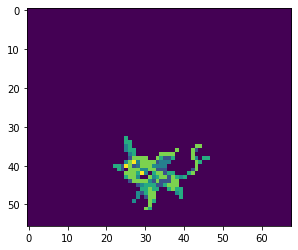

In [ ]:
import matplotlib.pyplot as plt

n=100# elijo el número de Pokémon que quiero visualizar
plt.imshow(imagenes[n])
print(nombres[n]) # nombre del Pokémon
print(imagenes[n].shape) # tamaño del sprite (todos tienen el mismo tamaño)

Ploteo 25 pokemones al azar:

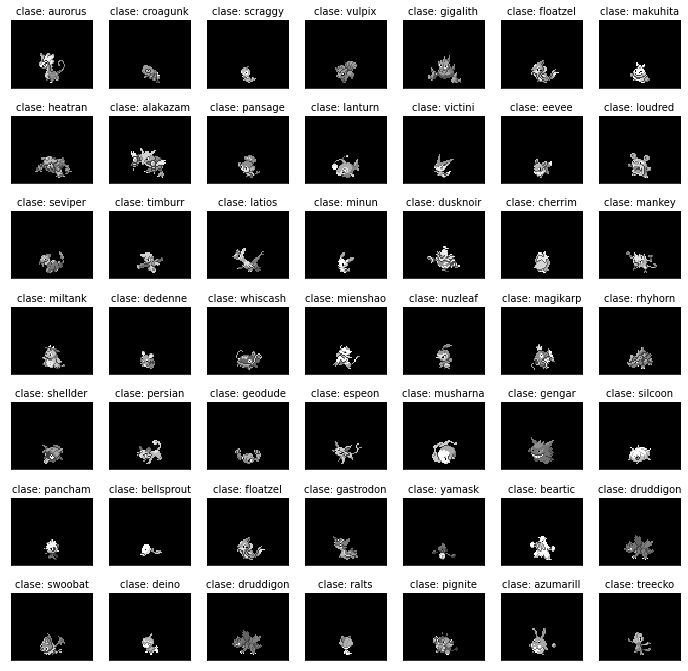

In [ ]:
# Ploteo 25 imagenes al azar del set de entrenamiento con sus respectivas clases
fig = plt.figure(figsize = (12,12)) # seteo el tamano de la figura
for i in range(49):
    j = np.random.randint(0, len(imagenes)) # en cada iteracion elijo un numero random entre 0 y la longitud de X_train_raw que es 60000 (el numero de imagenes) para usar de indice
    plt.subplot(7,7,i+1) # Voy a tener una matriz de 5x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(imagenes[j], interpolation='none', cmap="gray") # plotea una imagen random, pues es la imagen j-esima del set de entrenamiento, en formato (28,28) para imagenes en escala de grises
    plt.title("clase: {}".format(nombres[j]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()

Por otro lado, la información sobre los atributos de cada Pokémon (función) esta en un dataframe aparte:

In [ ]:
filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


Para poder trabajar con algoritmos de reducción de la dimensión y clustering, primero tenemos que representar los datos de sprites como una matriz, para eso tenemos que "desenrollarlos" como vimos en clase:

In [ ]:
data = np.zeros((len(nombres),56*68))

for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img


In [ ]:
imagenes[0].shape

(3808,)

In [ ]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Los enunciados del TP 3 son los siguientes:

1.   Usar el criterio de la Silueta para verificar que hay un máximo local cerca de k=8 clusters. Aplicar el algoritmo kmeans con k=8 clusters sobre los datos de *sprites* (matriz *data*).
2.   Visualizar las primeras dos componentes de la matriz de *sprites*, pintando con un color distinto los datos que pertenezcan a cada cluster, e indicando con cruces la posición de los centroides (ayuda: el código para hacer esto se encuentra en el notebook de clustering que vimos en clase).
3.   Visualizar los primeros 10 elementos de cada cluster. 
4.   En un mismo gráfico de barras, mostrar el valor promedio de los atributos *HP*, *Attack*, *Defense* y *Speed* de cada cluster. ¿Cuál es el cluster de Pokémones más fuertes?
5.   Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al *sprite* de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?
6.   Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster. ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros? 

**Optativo**

7.   Entrenar, evaluar y determinar la performance de un modelo de aprendizaje supervisado para predecir alguna característica de los Pokémones en base a sus *sprites*. Puede ser, por ejemplo, un modelo de regresión (predecir *HP*, *Attack*, *Defense*, *Speed*), un modelo de clasificación binaria (legendario o no legendario), o un modelo de clasificación multiclase (tipo del Pokémon: tierra, hielo, agua, fuego, etc).


## Limpieza de datos y Ordinal Encoding 
Esto lo voy a usar en el ítem 7

Borro las primeras 3 columnas:

In [ ]:
df.pop('Unnamed: 0')
df.pop('level_0')
df.pop('index')

0        0
1        1
2        2
3        4
4        5
      ... 
693    791
694    792
695    793
696    795
697    799
Name: index, Length: 698, dtype: int64

In [ ]:
df['Legendary']=df['Legendary'].replace(False,0)
df['Legendary']=df['Legendary'].replace(True,1)

In [ ]:
df=df.set_index('#')

In [ ]:
df_poke=df
df_poke

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
715,noivern,Flying,Dragon,535,85,70,80,97,80,123,6,0
716,xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,1
717,yveltal,Dark,Flying,680,126,131,95,131,98,99,6,1


In [ ]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,0


In [ ]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [ ]:
df['Type 2']

#
1      Poison
2      Poison
3      Poison
4         NaN
5         NaN
        ...  
715    Dragon
716       NaN
717    Flying
719     Fairy
721     Water
Name: Type 2, Length: 698, dtype: object

In [ ]:
df.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary      int64
dtype: object

Me guardo los labels a parte:

In [ ]:
df_labels=df['Name']
df_labels

#
1       bulbasaur
2         ivysaur
3        venusaur
4      charmander
5      charmeleon
          ...    
715       noivern
716       xerneas
717       yveltal
719       diancie
721     volcanion
Name: Name, Length: 698, dtype: object

In [ ]:
df.pop('Name')

#
1       bulbasaur
2         ivysaur
3        venusaur
4      charmander
5      charmeleon
          ...    
715       noivern
716       xerneas
717       yveltal
719       diancie
721     volcanion
Name: Name, Length: 698, dtype: object

Me armo una lista con todos los tipos de pokemon diferentes, y reemplazo en el dataframe, el nombre de cada pokemon por su posición en esa lista. Esto es lo que se conoce como 'ordinal encoding'.


In [ ]:
#Creo listas, con valores únicos:
type1_unicos=list(df['Type 1'].unique())
type2_unicos=list(df['Type 2'].unique())

In [ ]:
type12_todos=np.append(type1_unicos,type2_unicos)
type12_unicos=list(set(type12_todos))

In [ ]:
for elemento in type12_unicos:
  posicion=type12_unicos.index(elemento)
  df['Type 1']=df['Type 1'].replace(elemento,posicion)
  df['Type 2']=df['Type 2'].replace(elemento,posicion)

No hay tipo 1 de pokemon que sean 'nan':


In [ ]:
df['Type 1'].unique()==np.nan

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
df['Type 1'].unique().max()
df['Type 2']=df['Type 2'].replace('NaN',19)

In [ ]:
df['Type 2']=df['Type 2'].replace(np.nan,19)

In [ ]:
df.describe()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,8.372493,13.366762,415.912607,68.296562,74.808023,70.674785,68.157593,68.802292,65.173352,3.295129,0.054441
std,4.995429,7.314429,108.454036,25.731246,28.759386,29.311105,28.290425,26.807746,27.092806,1.655911,0.227049
min,0.000000,0.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000
25%,4.000000,8.000000,320.000000,50.000000,53.250000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000
50%,8.000000,19.000000,420.000000,65.000000,74.500000,65.000000,65.000000,65.000000,64.500000,3.000000,0.000000
75%,12.000000,19.000000,496.500000,80.000000,95.000000,85.000000,87.750000,85.000000,85.000000,5.000000,0.000000
max,18.000000,19.000000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000


In [ ]:
df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,7,14.0,318,45,49,49,65,65,45,1,0
2,7,14.0,405,60,62,63,80,80,60,1,0
3,7,14.0,525,80,82,83,100,100,80,1,0
4,8,19.0,309,39,52,43,60,50,65,1,0
5,8,19.0,405,58,64,58,80,65,80,1,0
...,...,...,...,...,...,...,...,...,...,...,...
715,0,18.0,535,85,70,80,97,80,123,6,0
716,2,19.0,680,126,131,95,131,98,99,6,1
717,17,0.0,680,126,131,95,131,98,99,6,1


In [ ]:
df_ej7=df

## 1) Coeficiente de Silhouette para las imagenes.

In [ ]:
# importamos el puntaje de silhouette
from sklearn.metrics import silhouette_score

In [ ]:
X=data

In [ ]:
# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []

# Se necesita tener al menos 2 clusters y a los sumo N-1 (con N el numero de muestras) para obtener coeficientes de Silohuette
for k in range(5, 10):
     kkkmeans = KMeans(n_clusters=k, n_init=300, max_iter=700,random_state=23)
     kkkmeans.fit(X)
     score = silhouette_score(X, kkkmeans.labels_)
     silhouette_coefficients.append(score)

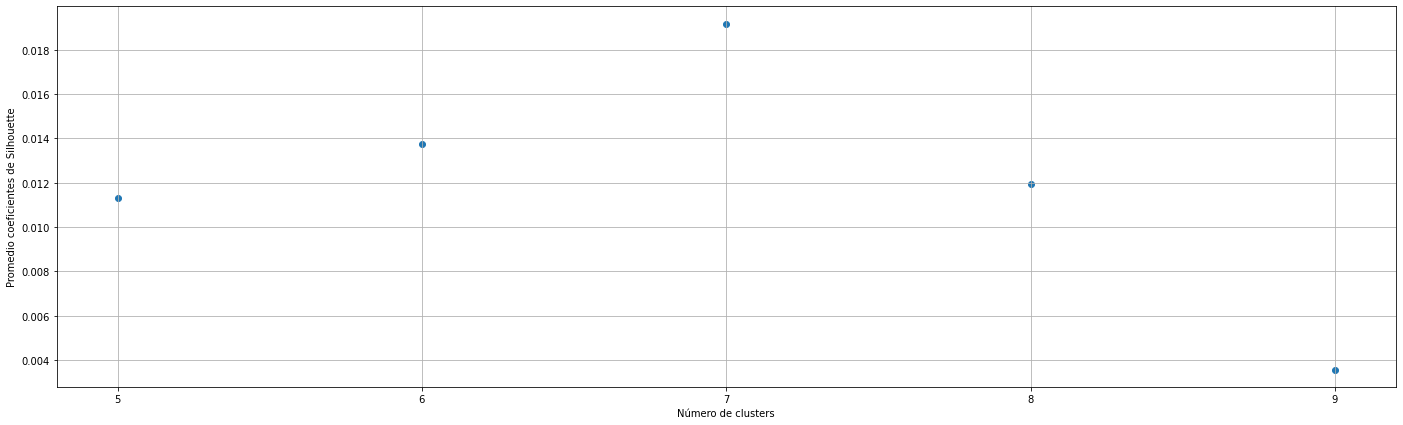

In [ ]:
fig, ax = plt.subplots(figsize = (24, 7))

# estas lineas son el grafico de SSEvsK
ax.scatter(range(5, 10), silhouette_coefficients)            
ax.set_xticks(range(5, 10))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")
plt.grid()

In [ ]:
k=np.arange(5,10)
print('El número de clusters que maximiza el Silhouette es:',k[np.argmax(silhouette_coefficients)] )

El número de clusters que maximiza el Silhouette es: 7


In [ ]:
kklabels = kkkmeans.labels_
kkklabels = kklabels.copy()

np.random.shuffle(kkklabels)

silhouette_score(X, kkklabels)

-0.018326891858432122

In [ ]:
k_optimo=k[np.argmax(silhouette_coefficients)]
k_optimo

7

## 2) Clustering para las imágenes

In [ ]:
# importamos las librerías usuales de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico

In [ ]:
# Clase para realizar componentes principales
from sklearn.decomposition import PCA

# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador

In [ ]:
X=imagenes

In [ ]:
# Ajustamos el estandarizador
std_scale.fit(X)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_scaled = std_scale.transform(X)


In [ ]:
#número de componentes no se específica, 
# se obtienen tantas componentes principales como features en nuestro dataset.
pca = PCA(n_components=50)

In [ ]:
# Ajustamos el modelo a los datos escaleados
pca.fit(X_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_pca = pca.transform(X_scaled)

print('Dimensiones de la matriz en componentes principales: {}'.format(X_pca.shape))
print(X_pca)

Dimensiones de la matriz en componentes principales: (698, 50)
[[ -8.56968162   6.91427908  -2.94317667 ...  -1.00822409  -0.57583304
    1.18610263]
 [ -6.42767943   3.94660528  -3.24604489 ...  -0.25898521  -1.24625505
   -0.47759539]
 [  0.59486385  -2.32757979   2.04808351 ...   0.09965528   0.64915475
    0.39419136]
 ...
 [  3.64447322 -10.01378389   4.31245111 ...  -0.78695052   2.55184492
   -1.20702225]
 [ -3.10717531  -1.77066299   1.81325497 ...   0.45633284  -1.21421885
   -0.72671574]
 [ -7.3738486    4.91658308  -1.60898745 ...  -0.67027129  -0.65637489
    1.1443213 ]]


Text(0, 0.5, 'Segunda componente principal')

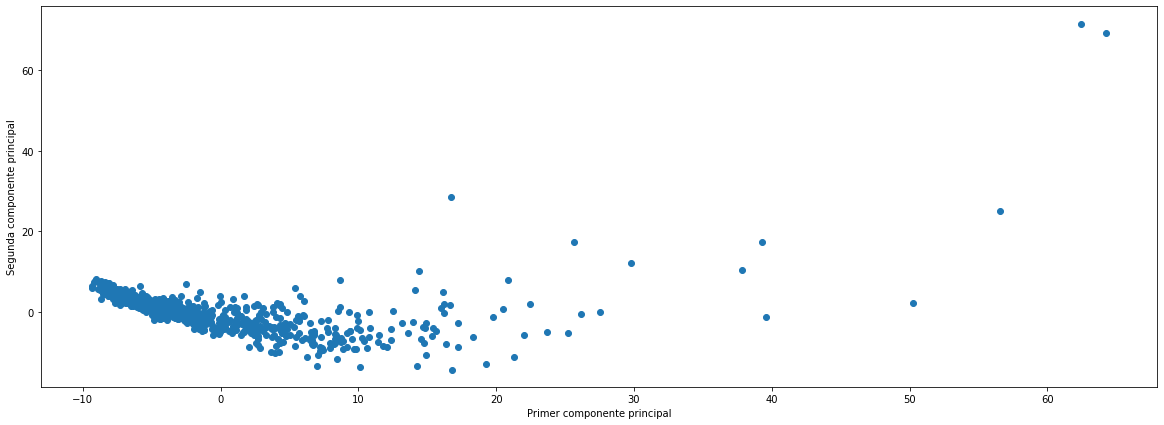

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1])


ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

In [ ]:
k_optimo=8

No handles with labels found to put in legend.


Text(0, 0.5, 'Segunda componente principal')

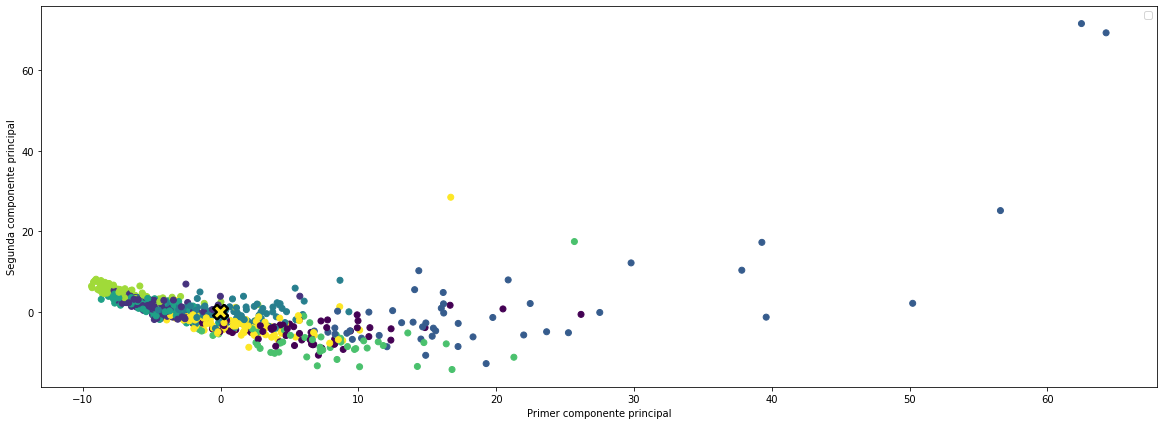

In [ ]:
# Creación del modelo KMeans con k = 17
kmeans17 = KMeans(n_clusters=k_optimo, n_init=300, max_iter=700,random_state=23)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans17.fit(X)

# Guardamos la posición de los centroids
centroids17 = kmeans17.cluster_centers_

# Plot
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans17.labels_)
ax.scatter(centroids17[:, 0], centroids17[:, 1], marker="X", s=200, linewidths=2,
            c=np.unique(kmeans17.labels_),edgecolors='black')
ax.legend()


ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

## 3) Visualizo las primeras 10 componentes de cada claster:

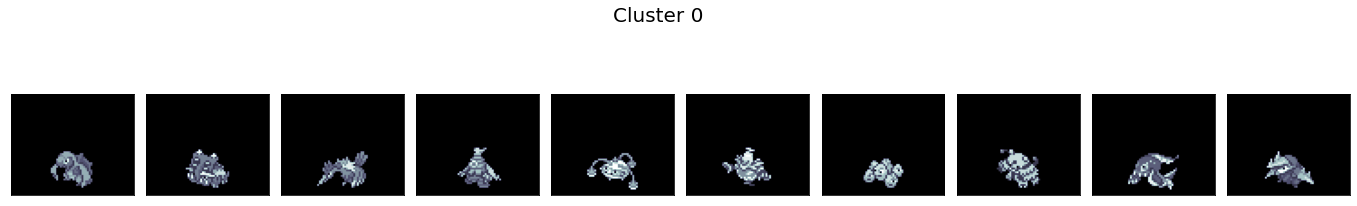

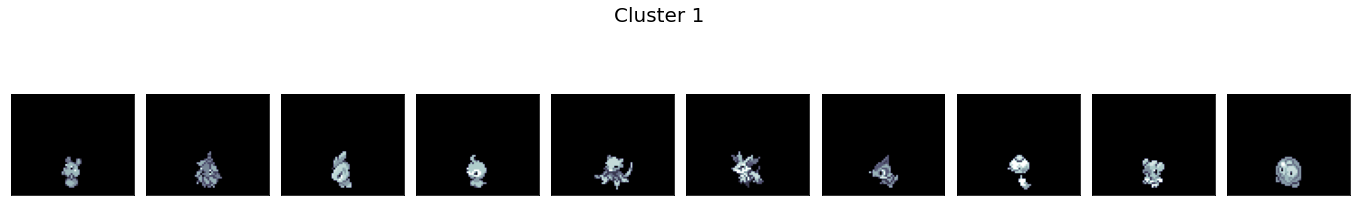

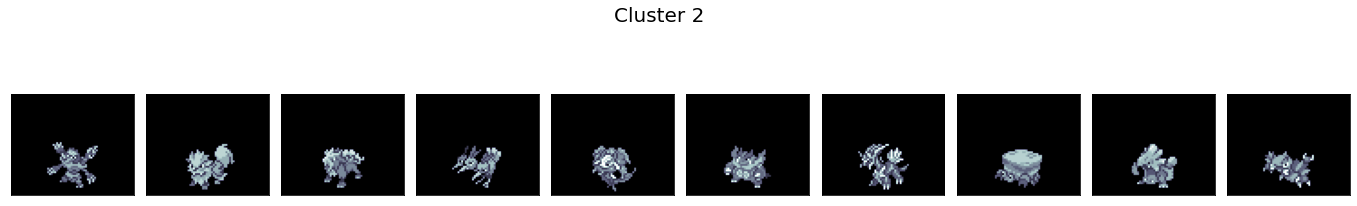

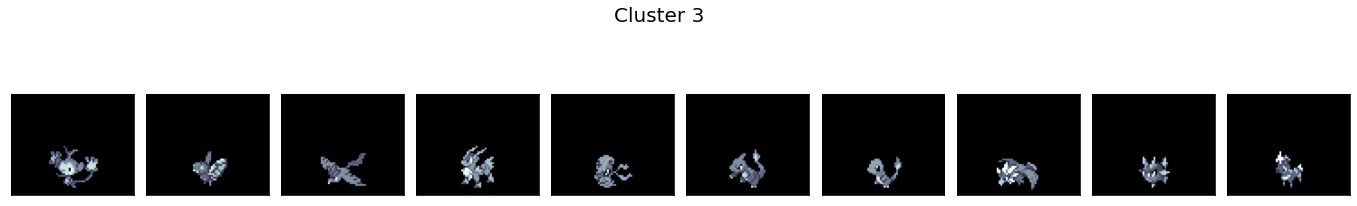

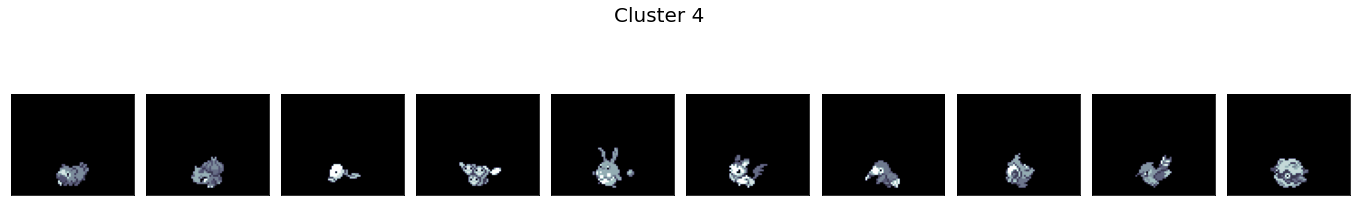

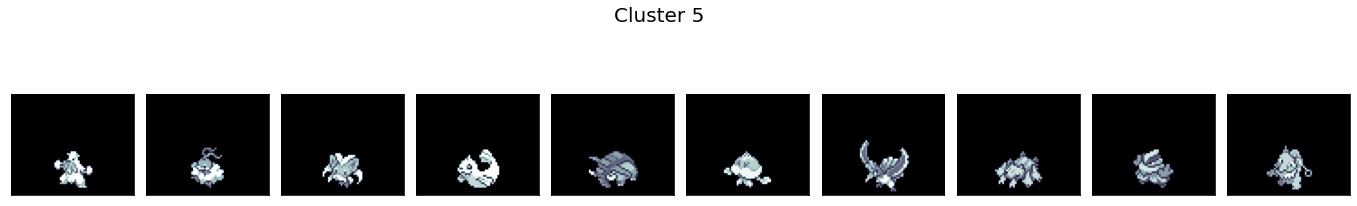

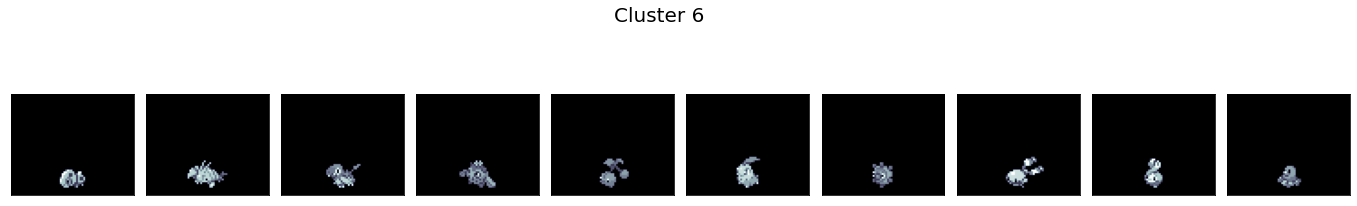

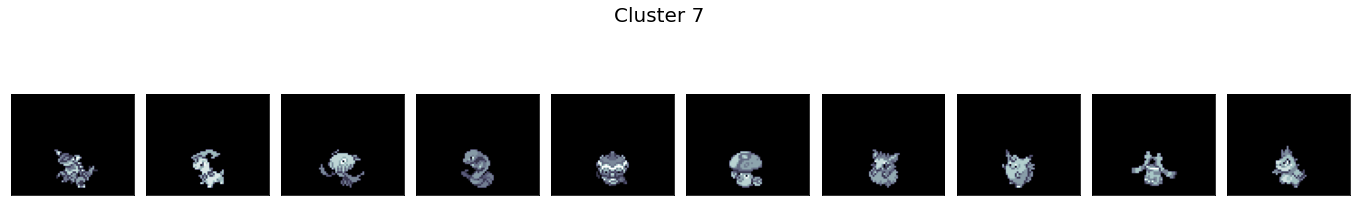

In [ ]:
# Mostrar el resultado final
labels = kmeans17.labels_
data=np.array(imagenes)

# Iniciamos un for con k=40 iteraciones
for i in range(k_optimo):
    index = np.nonzero(labels==i)[0]                                  # los índices correspondientes a la i-ésima etiqueta 
    num=10                                                   # el número de samples en cada cluster
    this_faces = data[index].reshape(len(index),56,68)                  # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (56,68) pixeles
    fig, axes = plt.subplots(1, num, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(this_faces[i], cmap='bone')

Atributos promedio para cada cluster:

In [ ]:
import pandas as pd

In [ ]:
columnas=['HP', 'Attack', 'Defense', 'Speed']
k=8

for cluster in range(k):
  for columna in columnas:
    col=list(df.columns).index(columna)
    filas=np.nonzero(labels==cluster)[0]
    list(df.iloc[filas, col])


In [ ]:
df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,7,14.0,318,45,49,49,65,65,45,1,0
2,7,14.0,405,60,62,63,80,80,60,1,0
3,7,14.0,525,80,82,83,100,100,80,1,0
4,8,19.0,309,39,52,43,60,50,65,1,0
5,8,19.0,405,58,64,58,80,65,80,1,0
...,...,...,...,...,...,...,...,...,...,...,...
715,0,18.0,535,85,70,80,97,80,123,6,0
716,2,19.0,680,126,131,95,131,98,99,6,1
717,17,0.0,680,126,131,95,131,98,99,6,1


In [ ]:
#Hay que resetear el índice, porque labels me da el número de fila
df=df.reset_index()

## Cluster

Creo 1 dataframe para cada cluster. El cual contiene HP, Attack, Defense y Speed de cada pokemon de ese cluster.

In [ ]:
columnas=['HP', 'Attack', 'Defense', 'Speed']
k=0
df_cluster0=df['#']
#Recorro las columnas que quiero poner en el hisograma
for columna in columnas:
  #Me quedo con la posicón de esa columna en la lista columnas
  col=list(df.columns).index(columna)
  #Me quedo con todas posiciones de las filas de cada cluster, por ahora la del 0
  filas=np.nonzero(labels==k)[0]
  #Las filas de interes:
  todas_filas=list(df.iloc[filas, col])
  #id_pokemon
  pos_idpoke= list(df.columns).index('#')
  id_pokemon=list(df.iloc[filas,pos_idpoke])
  #creo un dataframe auxiliar:
  df_aux=pd.DataFrame({columna: todas_filas,'#': id_pokemon})
  df_cluster0=pd.merge(df_cluster0, df_aux, how='inner', on='#')

In [ ]:
k=1
df_cluster1=df['#']
#Recorro las columnas que quiero poner en el hisograma
for columna in columnas:
  #Me quedo con la posicón de esa columna en la lista columnas
  col=list(df.columns).index(columna)
  #Me quedo con todas posiciones de las filas de cada cluster, por ahora la del 0
  filas=np.nonzero(labels==k)[0]
  #Las filas de interes:
  todas_filas=list(df.iloc[filas, col])
  #id_pokemon
  pos_idpoke= list(df.columns).index('#')
  id_pokemon=list(df.iloc[filas,pos_idpoke])
  #creo un dataframe auxiliar:
  df_aux=pd.DataFrame({columna: todas_filas,'#': id_pokemon})
  df_cluster1=pd.merge(df_cluster1, df_aux, how='inner', on='#')

###################################################################
k=2
df_cluster2=df['#']
#Recorro las columnas que quiero poner en el hisograma
for columna in columnas:
  #Me quedo con la posicón de esa columna en la lista columnas
  col=list(df.columns).index(columna)
  #Me quedo con todas posiciones de las filas de cada cluster, por ahora la del 0
  filas=np.nonzero(labels==k)[0]
  #Las filas de interes:
  todas_filas=list(df.iloc[filas, col])
  #id_pokemon
  pos_idpoke= list(df.columns).index('#')
  id_pokemon=list(df.iloc[filas,pos_idpoke])
  #creo un dataframe auxiliar:
  df_aux=pd.DataFrame({columna: todas_filas,'#': id_pokemon})
  df_cluster2=pd.merge(df_cluster2, df_aux, how='inner', on='#')
################################################
k=3
df_cluster3=df['#']
#Recorro las columnas que quiero poner en el hisograma
for columna in columnas:
  #Me quedo con la posicón de esa columna en la lista columnas
  col=list(df.columns).index(columna)
  #Me quedo con todas posiciones de las filas de cada cluster, por ahora la del 0
  filas=np.nonzero(labels==k)[0]
  #Las filas de interes:
  todas_filas=list(df.iloc[filas, col])
  #id_pokemon
  pos_idpoke= list(df.columns).index('#')
  id_pokemon=list(df.iloc[filas,pos_idpoke])
  #creo un dataframe auxiliar:
  df_aux=pd.DataFrame({columna: todas_filas,'#': id_pokemon})
  df_cluster3=pd.merge(df_cluster3, df_aux, how='inner', on='#')

####################################################
k=4
df_cluster4=df['#']
#Recorro las columnas que quiero poner en el hisograma
for columna in columnas:
  #Me quedo con la posicón de esa columna en la lista columnas
  col=list(df.columns).index(columna)
  #Me quedo con todas posiciones de las filas de cada cluster, por ahora la del 0
  filas=np.nonzero(labels==k)[0]
  #Las filas de interes:
  todas_filas=list(df.iloc[filas, col])
  #id_pokemon
  pos_idpoke= list(df.columns).index('#')
  id_pokemon=list(df.iloc[filas,pos_idpoke])
  #creo un dataframe auxiliar:
  df_aux=pd.DataFrame({columna: todas_filas,'#': id_pokemon})
  df_cluster4=pd.merge(df_cluster4, df_aux, how='inner', on='#')

############################################################################
k=5
df_cluster5=df['#']
#Recorro las columnas que quiero poner en el hisograma
for columna in columnas:
  #Me quedo con la posicón de esa columna en la lista columnas
  col=list(df.columns).index(columna)
  #Me quedo con todas posiciones de las filas de cada cluster, por ahora la del 0
  filas=np.nonzero(labels==k)[0]
  #Las filas de interes:
  todas_filas=list(df.iloc[filas, col])
  #id_pokemon
  pos_idpoke= list(df.columns).index('#')
  id_pokemon=list(df.iloc[filas,pos_idpoke])
  #creo un dataframe auxiliar:
  df_aux=pd.DataFrame({columna: todas_filas,'#': id_pokemon})
  df_cluster5=pd.merge(df_cluster5, df_aux, how='inner', on='#')

#############################################################################
k=6
df_cluster6=df['#']
#Recorro las columnas que quiero poner en el hisograma
for columna in columnas:
  #Me quedo con la posicón de esa columna en la lista columnas
  col=list(df.columns).index(columna)
  #Me quedo con todas posiciones de las filas de cada cluster, por ahora la del 0
  filas=np.nonzero(labels==k)[0]
  #Las filas de interes:
  todas_filas=list(df.iloc[filas, col])
  #id_pokemon
  pos_idpoke= list(df.columns).index('#')
  id_pokemon=list(df.iloc[filas,pos_idpoke])
  #creo un dataframe auxiliar:
  df_aux=pd.DataFrame({columna: todas_filas,'#': id_pokemon})
  df_cluster6=pd.merge(df_cluster6, df_aux, how='inner', on='#')

#################################################################
k=7
df_cluster7=df['#']
#Recorro las columnas que quiero poner en el hisograma
for columna in columnas:
  #Me quedo con la posicón de esa columna en la lista columnas
  col=list(df.columns).index(columna)
  #Me quedo con todas posiciones de las filas de cada cluster, por ahora la del 0
  filas=np.nonzero(labels==k)[0]
  #Las filas de interes:
  todas_filas=list(df.iloc[filas, col])
  #id_pokemon
  pos_idpoke= list(df.columns).index('#')
  id_pokemon=list(df.iloc[filas,pos_idpoke])
  #creo un dataframe auxiliar:
  df_aux=pd.DataFrame({columna: todas_filas,'#': id_pokemon})
  df_cluster7=pd.merge(df_cluster7, df_aux, how='inner', on='#')


Vuelvo a colocarle el índice:

In [ ]:
df_cluster0=df_cluster0.set_index('#')
df_cluster1=df_cluster1.set_index('#')
df_cluster2=df_cluster2.set_index('#')
df_cluster3=df_cluster3.set_index('#')
df_cluster4=df_cluster4.set_index('#')
df_cluster5=df_cluster5.set_index('#')
df_cluster6=df_cluster6.set_index('#')
df_cluster7=df_cluster7.set_index('#')

Un ejemplo de como quedaron los dataframe de 'df_cluster'. Ahora que tengo cadaatributo que quiero graficar, voy a calcular el valor promedio:

In [ ]:
df_cluster7

,HP,Attack,Defense,Speed
#,,,,
3,80,82,83,80
5,58,64,58,80
8,59,63,80,58
19,30,56,35,72
26,60,90,55,110
...,...,...,...,...
682,78,52,60,23
685,82,80,86,72
689,72,105,115,68


Caluclo los valores medios de cada atributo:

In [ ]:
valor_medio_c0=[]
valor_medio_c1=[]
valor_medio_c2=[]
valor_medio_c3=[]
valor_medio_c4=[]
valor_medio_c5=[]
valor_medio_c6=[]
valor_medio_c7=[]
for columna in df_cluster0.columns:
  valor_medio_c0.append(df_cluster0[columna].mean())
  valor_medio_c1.append(df_cluster1[columna].mean())
  valor_medio_c2.append(df_cluster2[columna].mean())
  valor_medio_c3.append(df_cluster3[columna].mean())
  valor_medio_c4.append(df_cluster4[columna].mean())
  valor_medio_c5.append(df_cluster5[columna].mean())
  valor_medio_c6.append(df_cluster6[columna].mean())
  valor_medio_c7.append(df_cluster7[columna].mean())

In [ ]:
df_vm_c0=pd.DataFrame({'ValorMedio':valor_medio_c0})
df_vm_c1=pd.DataFrame({'ValorMedio':valor_medio_c1})
df_vm_c2=pd.DataFrame({'ValorMedio':valor_medio_c2})
df_vm_c3=pd.DataFrame({'ValorMedio':valor_medio_c3})
df_vm_c4=pd.DataFrame({'ValorMedio':valor_medio_c4})
df_vm_c5=pd.DataFrame({'ValorMedio':valor_medio_c5})
df_vm_c6=pd.DataFrame({'ValorMedio':valor_medio_c6})
df_vm_c7=pd.DataFrame({'ValorMedio':valor_medio_c7})

In [ ]:
list(df_cluster1.columns)

['HP', 'Attack', 'Defense', 'Speed']

In [ ]:
df_c0=df_vm_c0.assign(Atributos=list(df_cluster0.columns))
df_c0.pop('ValorMedio')
df_c0=df_c0.assign(ValorMedio=df_vm_c0)

df_c1=df_vm_c1.assign(Atributos=list(df_cluster1.columns))
df_c1.pop('ValorMedio')
df_c1=df_c1.assign(ValorMedio=df_vm_c1)

df_c2=df_vm_c2.assign(Atributos=list(df_cluster2.columns))
df_c2.pop('ValorMedio')
df_c2=df_c2.assign(ValorMedio=df_vm_c2)

df_c3=df_vm_c3.assign(Atributos=list(df_cluster3.columns))
df_c3.pop('ValorMedio')
df_c3=df_c3.assign(ValorMedio=df_vm_c3)

df_c4=df_vm_c4.assign(Atributos=list(df_cluster4.columns))
df_c4.pop('ValorMedio')
df_c4=df_c4.assign(ValorMedio=df_vm_c4)

df_c5=df_vm_c5.assign(Atributos=list(df_cluster5.columns))
df_c5.pop('ValorMedio')
df_c5=df_c5.assign(ValorMedio=df_vm_c5)

df_c6=df_vm_c6.assign(Atributos=list(df_cluster6.columns))
df_c6.pop('ValorMedio')
df_c6=df_c6.assign(ValorMedio=df_vm_c6)

df_c7=df_vm_c7.assign(Atributos=list(df_cluster7.columns))
df_c7.pop('ValorMedio')
df_c7=df_c7.assign(ValorMedio=df_vm_c7)

In [ ]:
df_c0

,Atributos,ValorMedio
0,HP,67.606557
1,Attack,74.655738
2,Defense,71.131148
3,Speed,67.049180


## 4) Atributos 'HP', 'Attack', 'Defense', 'Speed', en promedio por cluster:

In [ ]:
dataframes_plot=[df_c0, df_c1, df_c2, df_c3, df_c4, df_c5, df_c6, df_c7]
nro_clusters=len(dataframes_plot)

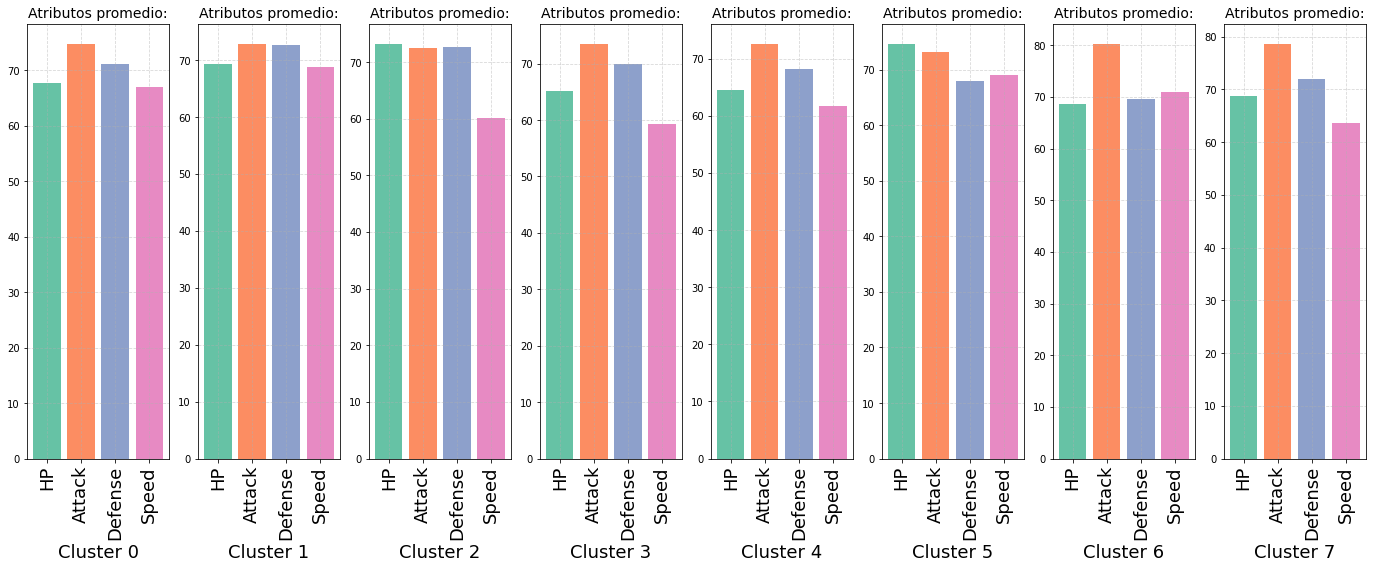

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 1, ncols = nro_clusters, figsize = (24, 8))
for i,df_plot in enumerate(dataframes_plot):
  axs[i].grid('on', linestyle = 'dashed', alpha = 0.5)
  axs[i].set_title('Atributos promedio:',fontsize=14)
  axs[i].set_ylabel('')
  axs[i].set_xlabel(f'Cluster {i}',fontsize=18)

  axs[i].bar(x = [i for i in range(len(df_plot))], # Definimos la ubicación de las barras a lo largo del eje horizontal
            height = [i for i in df_plot.ValorMedio], # Definimos la altura de las barras
            color = plt.get_cmap('Set2').colors
            )

  axs[i].set_xticks( [i for i in range(len(df_plot))])
  axs[i].set_xticklabels(list(df_plot.Atributos), rotation='vertical', fontsize=18)

In [ ]:
prom_cluster=[]
sum_cluster=[]
for df in dataframes_plot:
  prom_cluster.append(df.ValorMedio.mean())
  sum_cluster.append(df.ValorMedio.sum())

In [ ]:
print('Suma de todos los atributos',sum_cluster)
print('Valor del atributo promedio',prom_cluster)

Suma de todos los atributos [280.44262295081967, 283.66666666666663, 278.2978723404255, 267.9259259259259, 266.84693877551024, 284.8958333333333, 289.3152173913044, 282.95]
Valor del atributo promedio [70.11065573770492, 70.91666666666666, 69.57446808510637, 66.98148148148148, 66.71173469387756, 71.22395833333333, 72.3288043478261, 70.7375]



El cluster 6, es el que tiene más puntos si sumamos los valores de cada atributo promedio. Por ende, lo considero el cluster más fuerte.


## 5)   Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al *sprite* de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?


In [ ]:
df_cluster0

,HP,Attack,Defense,Speed
#,,,,
6,78,84,78,100
17,63,60,55,71
74,40,80,100,20
76,80,120,130,45
81,25,35,70,45
...,...,...,...,...
633,52,65,50,38
668,86,68,72,106
699,123,77,72,58


In [ ]:
# Mostrar el resultado final
labels = kmeans17.labels_
data=np.array(imagenes)
data_img0=[]
data_img1=[]
data_img2=[]
data_img3=[]
data_img4=[]
data_img5=[]
data_img6=[]
data_img7=[]
data_imgs=[data_img0,data_img1,data_img2,data_img3,data_img4,data_img5,data_img6,data_img7]

# Iniciamos un for con k=40 iteraciones
for i,data_img in enumerate(data_imgs):
    index = np.nonzero(labels==i)[0]                                  # los índices correspondientes a la i-ésima etiqueta 
    #print(data[index])
    print('-------------')
    data_img.append(data[index])
    data_img=data_img[0].copy()
    print(data_img)                

-------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ..

In [ ]:
data_img0=data_img0[0]
data_img1=data_img1[0]
data_img2=data_img2[0]
data_img3=data_img3[0]
data_img4=data_img4[0]
data_img5=data_img5[0]
data_img6=data_img6[0]
data_img7=data_img7[0]

Diferentes valores que adoptan los píxeles, para el cluster 0. Hay en total 9 vaores distintos:

In [ ]:
print('Valores únicos:',np.unique(data_img0[0]))
print('Cantidad de valores únicos:',len(set(data_img0[0])))

Valores únicos [  0  65  93 120 138 166 170 196 255]
Cantidad de valores únicos 9


In [ ]:
Counter(data_img0[0]).keys()

dict_keys([0, 170, 138, 120, 93, 65, 255, 196, 166])

In [ ]:
from collections import Counter

print(Counter(data_img0[0]).values())

dict_values([3526, 95, 23, 57, 52, 36, 3, 6, 10])


In [ ]:
a=pd.DataFrame({'Entradas':data_img0[0]})
a['Entradas'].value_counts()
a=a.replace(0,np.nan)
a=a.dropna()
tamaño_pokemon=a.shape[0]
print('El tamaño de este pokemon es:',tamaño_pokemon)

El tamaño de este pokemon es: 282


In [ ]:
tamaño_pokemon=[]
for i in range(data_img0.shape[0]):
  #El valor de las entradas de los pixeles de un pokemon, pasados a un dataframe:
  entradas_unpoke=pd.DataFrame({'Entradas':data_img0[i]})
  #Reemplazo los 0's por 'nan', es fácil borrar los 'nan' usando dropna. 
  entradas_unpoke=entradas_unpoke.replace(0,np.nan)
  entradas_unpoke=entradas_unpoke.dropna()
  tamaño_pokemon.append(entradas_unpoke.shape[0])

tamaño_promedio_c0=np.mean(tamaño_pokemon)


tamaño_pokemon=[]
for i in range(data_img1.shape[0]):
  #El valor de las entradas de los pixeles de un pokemon, pasados a un dataframe:
  entradas_unpoke=pd.DataFrame({'Entradas':data_img1[i]})
  #Reemplazo los 0's por 'nan', es fácil borrar los 'nan' usando dropna. 
  entradas_unpoke=entradas_unpoke.replace(0,np.nan)
  entradas_unpoke=entradas_unpoke.dropna()
  tamaño_pokemon.append(entradas_unpoke.shape[0])

tamaño_promedio_c1=np.mean(tamaño_pokemon)


tamaño_pokemon=[]
for i in range(data_img2.shape[0]):
  #El valor de las entradas de los pixeles de un pokemon, pasados a un dataframe:
  entradas_unpoke=pd.DataFrame({'Entradas':data_img2[i]})
  #Reemplazo los 0's por 'nan', es fácil borrar los 'nan' usando dropna. 
  entradas_unpoke=entradas_unpoke.replace(0,np.nan)
  entradas_unpoke=entradas_unpoke.dropna()
  tamaño_pokemon.append(entradas_unpoke.shape[0])

tamaño_promedio_c2=np.mean(tamaño_pokemon)

tamaño_pokemon=[]
for i in range(data_img3.shape[0]):
  #El valor de las entradas de los pixeles de un pokemon, pasados a un dataframe:
  entradas_unpoke=pd.DataFrame({'Entradas':data_img3[i]})
  #Reemplazo los 0's por 'nan', es fácil borrar los 'nan' usando dropna. 
  entradas_unpoke=entradas_unpoke.replace(0,np.nan)
  entradas_unpoke=entradas_unpoke.dropna()
  tamaño_pokemon.append(entradas_unpoke.shape[0])

tamaño_promedio_c3=np.mean(tamaño_pokemon)

tamaño_pokemon=[]
for i in range(data_img4.shape[0]):
  #El valor de las entradas de los pixeles de un pokemon, pasados a un dataframe:
  entradas_unpoke=pd.DataFrame({'Entradas':data_img4[i]})
  #Reemplazo los 0's por 'nan', es fácil borrar los 'nan' usando dropna. 
  entradas_unpoke=entradas_unpoke.replace(0,np.nan)
  entradas_unpoke=entradas_unpoke.dropna()
  tamaño_pokemon.append(entradas_unpoke.shape[0])

tamaño_promedio_c4=np.mean(tamaño_pokemon)

tamaño_pokemon=[]
for i in range(data_img5.shape[0]):
  #El valor de las entradas de los pixeles de un pokemon, pasados a un dataframe:
  entradas_unpoke=pd.DataFrame({'Entradas':data_img5[i]})
  #Reemplazo los 0's por 'nan', es fácil borrar los 'nan' usando dropna. 
  entradas_unpoke=entradas_unpoke.replace(0,np.nan)
  entradas_unpoke=entradas_unpoke.dropna()
  tamaño_pokemon.append(entradas_unpoke.shape[0])

tamaño_promedio_c5=np.mean(tamaño_pokemon)

tamaño_pokemon=[]
for i in range(data_img6.shape[0]):
  #El valor de las entradas de los pixeles de un pokemon, pasados a un dataframe:
  entradas_unpoke=pd.DataFrame({'Entradas':data_img6[i]})
  #Reemplazo los 0's por 'nan', es fácil borrar los 'nan' usando dropna. 
  entradas_unpoke=entradas_unpoke.replace(0,np.nan)
  entradas_unpoke=entradas_unpoke.dropna()
  tamaño_pokemon.append(entradas_unpoke.shape[0])

tamaño_promedio_c6=np.mean(tamaño_pokemon)

tamaño_pokemon=[]
for i in range(data_img7.shape[0]):
  #El valor de las entradas de los pixeles de un pokemon, pasados a un dataframe:
  entradas_unpoke=pd.DataFrame({'Entradas':data_img7[i]})
  #Reemplazo los 0's por 'nan', es fácil borrar los 'nan' usando dropna. 
  entradas_unpoke=entradas_unpoke.replace(0,np.nan)
  entradas_unpoke=entradas_unpoke.dropna()
  tamaño_pokemon.append(entradas_unpoke.shape[0])

tamaño_promedio_c7=np.mean(tamaño_pokemon)





print('Tamaño promedio de los pokemones en el cluster 0:',tamaño_promedio_c0)
print('Tamaño promedio de los pokemones en el cluster 1:',tamaño_promedio_c1)
print('Tamaño promedio de los pokemones en el cluster 2:',tamaño_promedio_c2)
print('Tamaño promedio de los pokemones en el cluster 3:',tamaño_promedio_c3)
print('Tamaño promedio de los pokemones en el cluster 4:',tamaño_promedio_c4)
print('Tamaño promedio de los pokemones en el cluster 5:',tamaño_promedio_c5)
print('Tamaño promedio de los pokemones en el cluster 6:',tamaño_promedio_c6)
print('Tamaño promedio de los pokemones en el cluster 7:',tamaño_promedio_c7)


Tamaño promedio de los pokemones en el cluster 0: 267.55737704918033
Tamaño promedio de los pokemones en el cluster 1: 154.72222222222223
Tamaño promedio de los pokemones en el cluster 2: 315.27659574468083
Tamaño promedio de los pokemones en el cluster 3: 199.82407407407408
Tamaño promedio de los pokemones en el cluster 4: 170.98979591836735
Tamaño promedio de los pokemones en el cluster 5: 288.5416666666667
Tamaño promedio de los pokemones en el cluster 6: 120.80434782608695
Tamaño promedio de los pokemones en el cluster 7: 219.74


In [ ]:
tamaño=[tamaño_promedio_c0,tamaño_promedio_c1,tamaño_promedio_c2,tamaño_promedio_c3,tamaño_promedio_c4,tamaño_promedio_c5,tamaño_promedio_c6,tamaño_promedio_c7]

In [ ]:
tamaño_promedio_c=pd.DataFrame({'Clusters':['c0','c1','c2','c3','c4','c5','c6','c7'],'Tamaño':[tamaño_promedio_c0,tamaño_promedio_c1,tamaño_promedio_c2,tamaño_promedio_c3,tamaño_promedio_c4,tamaño_promedio_c5,tamaño_promedio_c6,tamaño_promedio_c7]})
tamaño_promedio_c

,Clusters,Tamaño
0,c0,267.557377
1,c1,154.722222
2,c2,315.276596
3,c3,199.824074
4,c4,170.989796
5,c5,288.541667
6,c6,120.804348
7,c7,219.740000


In [ ]:
fuerza=[280.44262295081967, 283.66666666666663, 278.2978723404255, 267.9259259259259, 266.84693877551024, 284.8958333333333, 289.3152173913044, 282.95]
Fuerza_promedio_c=pd.DataFrame({'Clusters':['c0','c1','c2','c3','c4','c5','c6','c7'],'Fuerza':fuerza})
Fuerza_promedio_c

,Clusters,Fuerza
0,c0,280.442623
1,c1,283.666667
2,c2,278.297872
3,c3,267.925926
4,c4,266.846939
5,c5,284.895833
6,c6,289.315217
7,c7,282.950000


[Text(0, 0, 'c0'),
 Text(0, 0, 'c1'),
 Text(0, 0, 'c2'),
 Text(0, 0, 'c3'),
 Text(0, 0, 'c4'),
 Text(0, 0, 'c5'),
 Text(0, 0, 'c6'),
 Text(0, 0, 'c7')]

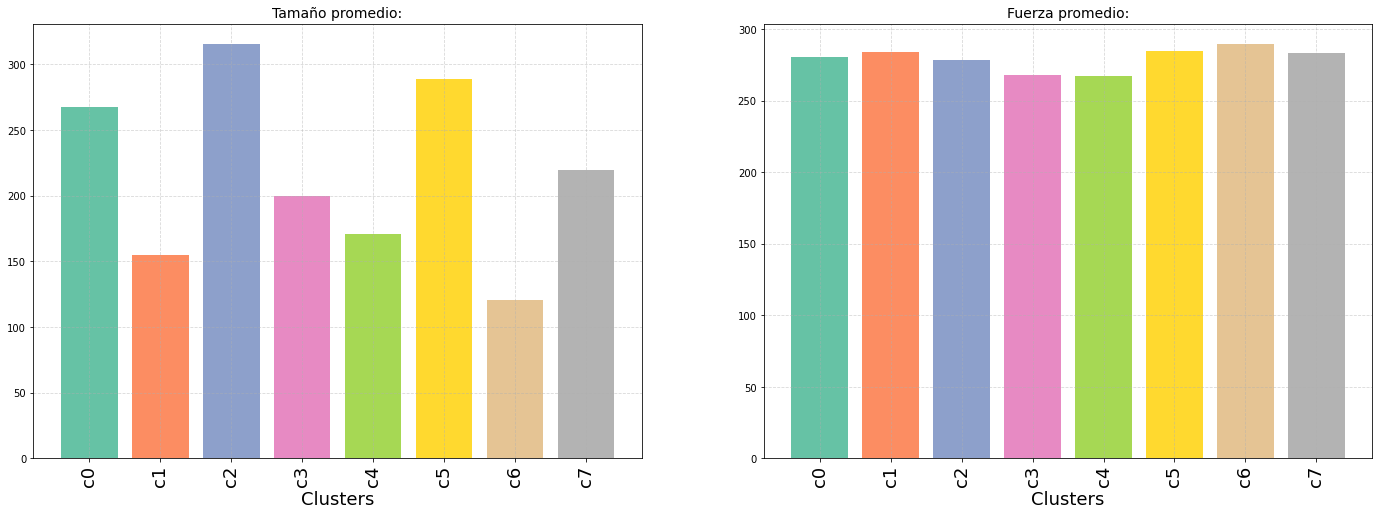

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 8))


axs[0].grid('on', linestyle = 'dashed', alpha = 0.5)
axs[0].set_title('Tamaño promedio:',fontsize=14)
axs[0].set_ylabel('')
axs[0].set_xlabel(f'Clusters',fontsize=18)

axs[0].bar(x = [i for i in range(len(tamaño_promedio_c))], # Definimos la ubicación de las barras a lo largo del eje horizontal
          height = [i for i in tamaño_promedio_c.Tamaño], # Definimos la altura de las barras
          color = plt.get_cmap('Set2').colors
          )

axs[0].set_xticks( [i for i in range(len(tamaño_promedio_c))])
axs[0].set_xticklabels(list(tamaño_promedio_c.Clusters), rotation='vertical', fontsize=18)



axs[1].grid('on', linestyle = 'dashed', alpha = 0.5)
axs[1].set_title('Fuerza promedio:',fontsize=14)
axs[1].set_ylabel('')
axs[1].set_xlabel(f'Clusters',fontsize=18)

axs[1].bar(x = [i for i in range(len(Fuerza_promedio_c))], # Definimos la ubicación de las barras a lo largo del eje horizontal
          height = [i for i in Fuerza_promedio_c.Fuerza], # Definimos la altura de las barras
          color = plt.get_cmap('Set2').colors
          )

axs[1].set_xticks( [i for i in range(len(Fuerza_promedio_c))])
axs[1].set_xticklabels(list(Fuerza_promedio_c.Clusters), rotation='vertical', fontsize=18)

En el gráfico de la izquierda se puede observar el tamaño promedio de los pokemons de cada cluster (osea la cantidad de entradas no vacías de cada imagen). Se puede ver que tamaño promedio de cada cluster es muy distinto dependiendo del cluster. En el histograma de la derecha está la fuerza promedio de cada cluster (la suma de todos los atributos promedio, de cada pokemon del cluster), en este caso la variación de la fuerza promedio es pequeña entre cluster.

Graficamos la fuerza vs el tamaño para ver más en detalle:

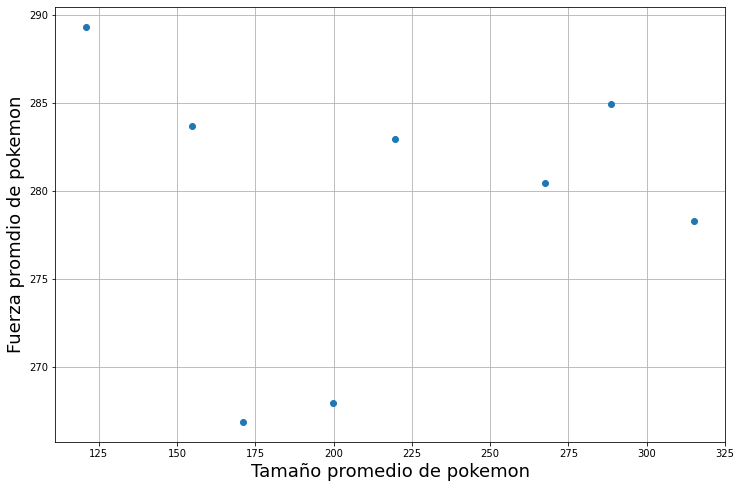

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(tamaño,fuerza,'o')
plt.ylabel('Fuerza promdio de pokemon',fontsize=18)
plt.xlabel('Tamaño promedio de pokemon',fontsize=18)
#plt.hlines(y=np.mean(fuerza), xmin=120, xmax=326, colors='red', linestyles='dashed')

plt.grid()

En el gráfico de arriba se grafico la fuerza promedio de los pokemon para cada cluster vs el tamaño promedio de los pokeones de cada cluster. No se observa una relación entre la fuerza y el tamaño para los clusters. En particular el cluster con pokemones más grande en promedio, es uno de los menos fuertes.


Por lo tanto, un cluster con pokemones más grandes(en promedio) no significa que será un cluster con pokemones más fuertes(en promedio).

## 6)   Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster. ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros? 

Uso el dataframe 'df_cluster' y lo intersecto con el dataframe 'df' que contiene si los pokemones son o no Legendarios. Para esto, uso el nro de pokemon, que está en la columna '#'.

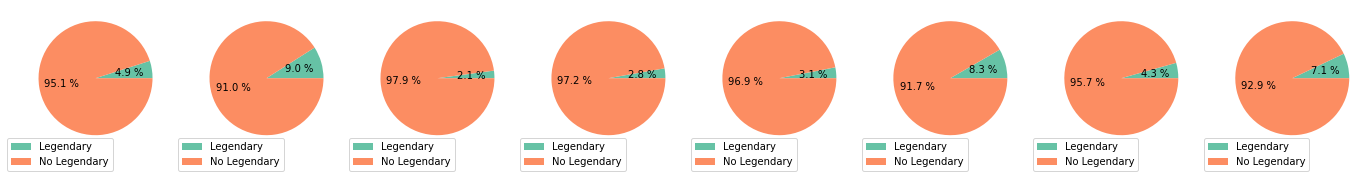

In [ ]:
df_clusters=[df_cluster0,df_cluster1,df_cluster2,df_cluster3,df_cluster4,df_cluster5,df_cluster6,df_cluster7]
label_legendarios=['Legendary','No Legendary']
fig, axs = plt.subplots(nrows = 1, ncols = len(df_clusters), figsize = (24, 8))
porc_leg=[]
#df_tortas=[df_torta_c0,df_torta_c1,df_torta_c2,df_torta_c3,]

for i, df_cluster_aux in enumerate(df_clusters):
  #Le saco el indice a los dataframe
  df_cluster_aux=df_cluster_aux.reset_index()
  #Me quedo con la columna del numero de pokemones(es una serie pandas), y lo convierto a dataframe
  df_cluster_aux=df_cluster_aux['#'].to_frame()
  #Me quedo con la intersección entre el dataframe 'df_poke' que contiene todos los datos de todos los pokemones
  #Y 'df_cluster_aux' que tiene los identificadores de los pokemones de cada cluster para cada iteración del for.
  df_cluster = df_poke.merge(df_cluster_aux, how = 'inner', on='#')
  num_leg=sum(df_cluster['Legendary']) #Como cada pokemon que es legendario, aparece con un 1 y los que no con 0.
  # Si los sumo, me da la cantidad de pokemones legendarios.
  num_no_leg=df_cluster.shape[0]-num_leg#La cantidad de no legendarios
  array_cluster=np.array([num_leg,num_no_leg]) #Array con la cantidad de pokemones legendarios y no legendarios
  serie_cluster=pd.Series(array_cluster)#Convierto el array de la línea anterior a una serie pandas (el input necesario para plotear en el grafico de torta)

  #Ploteo el grafico de tortas
  porc=serie_cluster / serie_cluster.sum()
  porc_leg.append(porc[0])
  axs[i].pie(serie_cluster / serie_cluster.sum(),
            colors = plt.get_cmap('Set2').colors, autopct="%0.1f %%")

  axs[i].legend(label_legendarios, loc = (-0.12,-0.15))


plt.show()


In [ ]:
porc_leg

[0.04918032786885246,
 0.09027777777777778,
 0.02127659574468085,
 0.027777777777777776,
 0.030612244897959183,
 0.08333333333333333,
 0.043478260869565216,
 0.0707070707070707]

In [ ]:
print('Suma de todos los atributos',sum_cluster)

Suma de todos los atributos [280.44262295081967, 283.66666666666663, 278.2978723404255, 267.9259259259259, 266.84693877551024, 284.8958333333333, 289.3152173913044, 282.95]


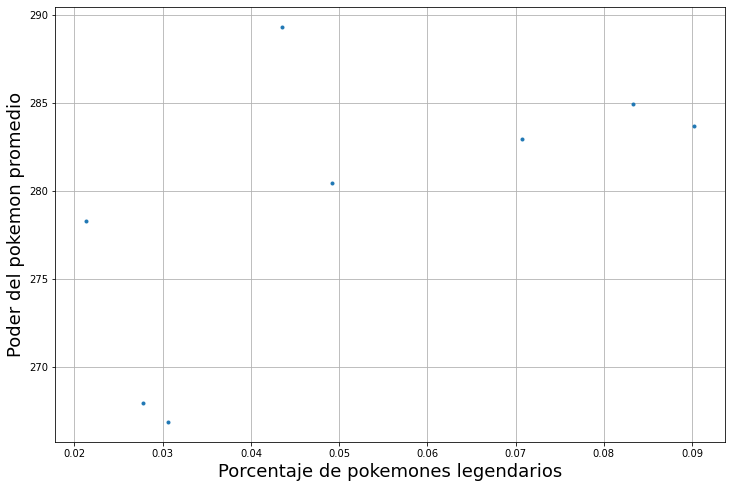

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(porc_leg,sum_cluster,'.')
plt.ylabel('Poder del pokemon promedio',fontsize=18)
plt.xlabel('Porcentaje de pokemones legendarios',fontsize=18)
plt.grid()

Se puede observar que el cluster más poderoso(el cluster 6) no es el que más pokemones legendarios tiene. Solo cuenta con un 4,3% de pokemones legendarios, situandose como el quinto cluster con más pokemones legendarios(de 8).



Se graficó el poder del pokemon promedio, osea la suma de 'HP', 'Attack', 'Defense', 'Speed' de todos los pokemones de cada cluster, dividido el numero total de pokemones en función del porcentaje de pokemones legendarios que hay en ese cluster. Se puede observar, salvo en el cluster 2 y el cluster 6(el más fuerte) una tendencia Creciente. 

## 7) Voy a entrenar, evaluar y determinarla performance de un modelo de clasificación binaria, para predecir si un pokemon es legendario o no.

El dataframe 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

Las columnasque voy a usar para entrenar

In [ ]:
df_ej7.columns[:len(df_ej7.columns)-1]

Index(['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation'],
      dtype='object')

In [ ]:
y = np.array(df_ej7['Legendary']) # armo el vector de etiquetas

# vamos a entrenar un modelo usando únicamente variables asociadas a clima
columnas_entrenamiento = df_ej7.columns[:len(df_ej7.columns)-1] 

# extraigo la matriz de features X
X = np.array(df_ej7[columnas_entrenamiento])


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
# pruebo con un random forest, con alpha = 1.47e-07
clf = RandomForestClassifier()

# ajusto el modelo
clf.fit(X_train, y_train)

# armo el vector de predicciones.
y_hat_test = clf.predict_proba(X_test)[:, 1]
y_hat_train = clf.predict_proba(X_train)[:, 1]

# evaluo el AUC
roc_test = roc_auc_score(y_test, y_hat_test)
roc_train = roc_auc_score(y_train, y_hat_train)
roc_test, roc_train

(0.9968021927820924, 1.0)

Sospecho que la peformance es ta buena porque en el orden de los pokemones se esconde información, por ejemplo: los primeros de cada generación son los pokemones iniciales, y los últimos son legendarios. Así que barajo las filas:

In [ ]:
df_shuffle=df_ej7.sample(frac=1).reset_index(drop=True)
df_shuffle

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,8,19.0,309,39,52,43,60,50,65,1,0
1,18,1.0,600,80,80,90,110,130,110,3,1
2,16,19.0,390,70,105,105,50,40,20,5,0
3,11,19.0,400,65,73,55,47,75,85,3,0
4,10,19.0,300,50,75,85,20,30,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...
693,3,19.0,200,20,10,55,15,20,80,1,0
694,16,3.0,355,35,40,100,90,55,35,1,0
695,7,19.0,280,45,35,50,70,50,30,5,0
696,13,16.0,530,70,110,180,60,60,50,3,0


In [ ]:
y = np.array(df_shuffle['Legendary']) # armo el vector de etiquetas

# vamos a entrenar un modelo usando únicamente variables asociadas a clima
columnas_entrenamiento = df_shuffle.columns[:len(df_shuffle.columns)-1] 

# extraigo la matriz de features X
X = np.array(df_shuffle[columnas_entrenamiento])


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
# pruebo con un random forest, con alpha = 1.47e-07
clf = RandomForestClassifier()

# ajusto el modelo
clf.fit(X_train, y_train)

# armo el vector de predicciones.
y_hat_test = clf.predict_proba(X_test)[:, 1]
y_hat_train = clf.predict_proba(X_train)[:, 1]

# evaluo el AUC
roc_test = roc_auc_score(y_test, y_hat_test)
roc_train = roc_auc_score(y_train, y_hat_train)
roc_test, roc_train

(0.9914096056228037, 1.0)

El feature más imporante para determinar si un pokemon es o no legendario, es la suma total de sus atributos:

In [ ]:
clf.feature_importances_

array([0.03844463, 0.03085117, 0.49226824, 0.0658957 , 0.05606323,
       0.06432813, 0.08438996, 0.0776855 , 0.07031041, 0.01976303])

## Que tanto mejor que el azar es mi modelo:

In [ ]:
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import StratifiedKFold


clf = RandomForestClassifier()   # creamos un objeto clasificador
skf = StratifiedKFold(n_splits=5, shuffle=True) # creamos un objeto de cross-validation

AUC, AUC_shuffled, pvalue = permutation_test_score(clf, X, y, scoring="roc_auc", cv=skf, n_permutations=100) # aca aplico la funcion 
# Notar que la función de arriba recibe como argumentos el clasificador (clf) y la forma de hacer validación cruzada (skf), 
# además de los datos y el número de permutaciones que hacemos para construir nuestro modelo al azar.

print('Sin shufflear:')
print(AUC)
print('Modelo nulo (shuffleando):')
print(AUC_shuffled)
print('p-valor:')
print(pvalue)

Sin shufflear:
0.9364440893877651
Modelo nulo (shuffleando):
[0.50634103 0.49731837 0.51133897 0.50485933 0.4977057  0.49504987
 0.49390532 0.49794822 0.4988983  0.50734558 0.49512506 0.49588718
 0.5083348  0.50668635 0.48582141 0.49743996 0.50047948 0.50840538
 0.50739419 0.50870853 0.50953768 0.49378364 0.50308319 0.50565192
 0.49596019 0.50708356 0.49738096 0.50301808 0.49675488 0.50273768
 0.49783319 0.4938907  0.49022583 0.49507293 0.50170968 0.48405359
 0.49378394 0.50177232 0.50261996 0.49089655 0.49544975 0.50117047
 0.49279294 0.4913789  0.50062938 0.50751554 0.49664236 0.5070081
 0.5121442  0.49968538 0.49458996 0.50324632 0.4875674  0.50032442
 0.51350643 0.49756923 0.5027774  0.50456511 0.49896092 0.49422442
 0.49896461 0.50835082 0.50081365 0.48613939 0.4965942  0.50335865
 0.49706897 0.50656281 0.50322732 0.50372484 0.4875995  0.50971484
 0.49886523 0.49009729 0.49875199 0.50335274 0.50196089 0.50852608
 0.50434643 0.49899247 0.49254958 0.50063023 0.49039172 0.50427829
 0

Text(0, 0.5, 'Probabilidad')

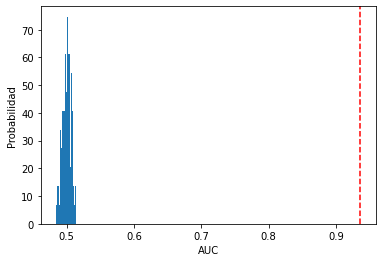

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(AUC_shuffled, bins=20, density=True) # armo el histograma de valores, normalizado para tener la probabilidad
ax.axvline(AUC, ls='--', color='r') # una linea vertical para indicar el AUC sin shufflear (modelo real)
ax.set_xlabel("AUC") # nombre de eje x
ax.set_ylabel("Probabilidad") # nombre de eje y

Ahora que se que el feature más importante es el de atributos totales, osea 'Total'. Me gustaría ver cómo el comportamiento de este atributo, influye en la predicción de mi modelo, de si es o no un pokemon legendario. Para esto insalo la librería pdpbox:

In [ ]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 201 kB/s 
     |████████████████████████████████| 13.1 MB 11 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=4c7fd5f4b6b8f870c7d74fb23656017560cb362eb26ce4f84d4b5f2c943d7c35
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Necesito que usar los datos en formato dataframe:

In [ ]:
df_X=df_shuffle[columnas_entrenamiento]
# train-test split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, y, test_size=0.3, random_state=10)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


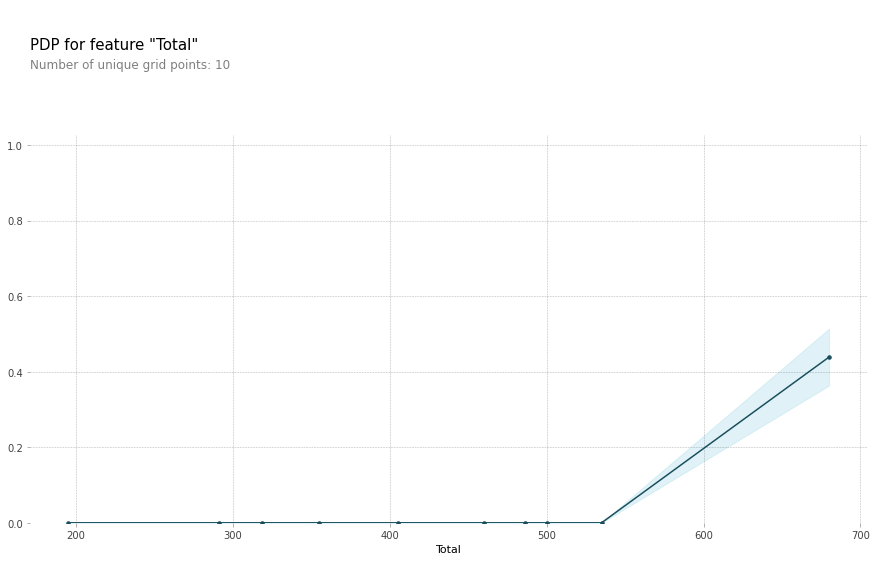

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feat_name = 'Total'
#Features que uso para entrenar el modelo 
base_features=columnas_entrenamiento
pdp_dist = pdp.pdp_isolate(model=clf, dataset=df_X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

¿Cómo se interpreta el gráfico de arriba? Bueno, en el eje y, tenemos como mejora la performance del modelo vs el valor que adopta el feature 'Total'. El hecho de que aumente tanto, cuando el valor 'Total' pase los 550 significa que esa es una carcterística típica de un pokemon legendario: que la suma total de puntos sea myr a 550. Esto también significaque un pokemon legendario es mucho más fuerte que un pokemon no legendario.

Veamos lo siguiente:

In [ ]:
# No legendario - 0
# Legendario - 1
df.groupby('Legendary').Total.mean()

Legendary
0    403.965152
1    623.421053
Name: Total, dtype: float64

El valor promedio de la fuerza de un pokemon Legendario es 623, mucho mayor que el de un pokemon no legendario: 403. En promedio un pokemon legendario es un 30% más fuerte que uno no legendario.

Entonces, por qué esto no se observa en los gráficos del ejercicio 6?. Por qué los cluster con más pokemones legendarios no son significativamente más fuertes que los cluster con menos pokemones legendario?.
Hay dos puntos a observar para responder esto. La primera es la cantidad de pokemones legendarios, veamos cuantos pokemones legendarios y no legendarios hay:

In [ ]:
print('Legendarios:')
print(df.groupby('Legendary').Legendary.sum())
num_leg=df.groupby('Legendary').Legendary.sum()[1]
print('No legendarios')
print(df.groupby('Legendary').Legendary.count()-df.groupby('Legendary').Legendary.sum())
num_noleg=df.groupby('Legendary').Legendary.count()-df.groupby('Legendary').Legendary.sum()
porc_leg=num_leg*100/num_noleg[0]
print(' porcentaje son legendarios')
print(porc_leg)

Legendarios:
Legendary
0     0
1    38
Name: Legendary, dtype: int64
No legendarios
Legendary
0    660
1      0
Name: Legendary, dtype: int64
 porcentaje son legendarios
5.757575757575758


Hay 38 pokemones legendarios y 660 no legendarios. 

Solo el 6% de los pokemones son legendarios, no son los suficientes como para que se pueda apreciar el peso del total del atributos en los clusters del ejercicio 6.